1、基本元素-图片

加载图片，显示图片，保存图片

cv.imread() cv.imshow() cv2.imwrite()

大部分人可能都知道电脑上的彩色图是以 RGB(红-绿-蓝，Red-Green-Blue)颜色模式显示的，但 OpenCV 中彩色图是以 B-G-R 通道顺序存储的，灰度图只有一个通道

In [4]:
import cv2

# 加载灰度图
# 参数1：图片的文件名

# 如果图片放在当前文件夹下，直接写文件名就行了，如’lena.jpg’
# 否则需要给出绝对路径，如’D:\OpenCVSamples\lena.jpg’
# 参数2：读入方式，省略即采用默认值

# cv2.IMREAD_COLOR：彩色图，默认值(1)
# cv2.IMREAD_GRAYSCALE：灰度图(0)
# cv2.IMREAD_UNCHANGED：包含透明通道的彩色图(-1)
img = cv2.imread('test.png', 1)

cv2.imshow('lemo', img)
# cv2.waitKey()是让程序暂停的意思，参数是等待时间（毫秒 ms）。时间一到，会继续执行接下来的程序，传入 0 的话表示一直等待。
cv2.waitKey(0)

cv2.imwrite('lemo_save.jpg', img)

True

2、打开摄像头

打开摄像头并捕获照片，播放本地视频，录制视频

cv2.VideoCapture() cv2.VideoWriter()

In [3]:
import cv2

# 参数 0 指的是摄像头的编号，如果你电脑上有两个摄像头的话，访问第 2 个摄像头就可以传入 1，依此类推
cap = cv2.VideoCapture(0)

while(True):
    # 获取一帧
    ret, frame = cap.read()
    # 转为灰度图片
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('lemo', gray)

    if cv2.writeKey == ord('q'):
        break

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
# 播放本地视频
capture = cv2.VideoCapture('demo_video.mp4')

while(capture.isOpened()):
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(30) == ord('q'):
        break

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# 录制视频
capture = cv2.VideoCapture(0)

# 定义编码方式并创建VideoWriter对象
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
outfile = cv2.VideoWriter('output.avi', fourcc, 25., (640, 480))

while(capture.isOpened()):
    ret, frame = capture.read()
    if ret:
        outfile.write(frame)  # 写入文件
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break

3、访问和修改图片像素点的值，
获取图片的宽、高、通道数等属性，
了解感兴趣区域 ROI，
分离和合并图像通道

In [10]:
import cv2

img = cv2.imread('test.png', 1)

px = img[100, 90]
print(px)

px_blue = img[100, 90, 0]
print(px_blue)

# 修改像素值
img[100, 90] = [255, 255, 255]

print(img.shape)

height, width,channels = img[100, 90]

print(img.dtype)  # uint8

print(img.size)

[154  65 134]
154
(393, 740, 3)


In [12]:
# 截取脸部ROI
ROI = img[115:180, 100:200]
cv2.imshow('face', ROI)
cv2.waitKey(0)

-1

In [19]:
# 彩色图的 BGR 三个通道是可以分开单独访问的，也可以将单独的三个通道合并成一副图像。分别使用 cv2.split() 和 cv2.merge()
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

# 提取 B 通道
b = img[:, :, 0]
cv2.imshow('blue', b)
cv2.waitKey(0)

-1

4、颜色空间转换

颜色空间转换，如 BGR ↔ Gray，BGR ↔ HSV等

追踪视频中特定颜色的物体

OpenCV 函数：cv2.cvtColor(), cv2.inRange()

In [6]:
import cv2
img = cv2.imread('test.png')
# 转换为灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)
cv2.imshow('gray', img_gray)
cv2.waitKey(0)

-1

In [8]:
# cv2.cvtColor() 用来进行颜色模型转换，参数 1 是要转换的图片，参数 2 是转换模式， COLOR_BGR2GRAY 表示 BGR→Gray，可用下面的代码显示所有的转换模式：

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [9]:
import numpy as np

capture = cv2.VideoCapture('demo_video.mp4')

# 蓝色的范围，不同光照条件下不一样，可灵活调整

lower_blue = np.array([100, 110, 110])
upper_blue = np.array([130, 255, 255])

while(capture.isOpened()):
    # 1.捕获视频中的一帧
    ret, frame = capture.read()

    # 2.从BGR转换到HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # 3.inRange()：介于lower/upper之间的为白色，其余黑色
    # 函数很简单，参数有三个
    # 第一个参数：hsv指的是原图
    # 第二个参数：lower_red指的是图像中低于这个lower_red的值，图像值变为0
    # 第三个参数：upper_red指的是图像中高于这个upper_red的值，图像值变为0
    # 而在lower_red～upper_red之间的值变成255
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # 4.只保留原图中的蓝色部分
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)

    if cv2.waitKey(1) == ord('q'):
        break

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


5、阈值分割

使用固定阈值、自适应阈值和 Otsu 阈值法”二值化”图像

OpenCV 函数：cv2.threshold(), cv2.adaptiveThreshold()

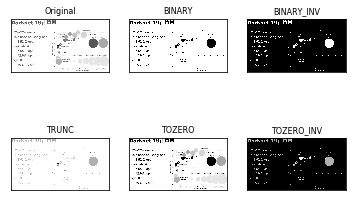

In [1]:
import cv2
import matplotlib.pyplot as plt

# 灰度图读入
img = cv2.imread('test.png', 0)

# 应用5种不同的阈值方法
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

# 使用Matplotlib显示
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
plt.show()

6、图像几何变换

实现旋转、平移和缩放图片

OpenCV 函数：cv2.resize(), cv2.flip(), cv2.warpAffine()

图像的几何变换从原理上看主要包括两种：基于 2×3 矩阵的仿射变换（平移、缩放、旋转和翻转等）、基于 3×3 矩阵的透视变换

In [2]:
# 缩放图片
import cv2

img = cv2.imread('test.png', 1)

res1 = cv2.resize(img, (132, 150))
res2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

cv2.imshow('res1', res1)
cv2.imshow('res2', res2)
cv2.waitKey(0)

-1

In [ ]:
# 翻转图片
# 其中，参数2 = 0：垂直翻转(沿x轴)，参数2 > 0: 水平翻转(沿y轴)，参数2 < 0: 水平垂直翻转。
cv2.flip(img, 1)

In [10]:
# 平移图片
import numpy as np

rows, cols = img.shape[:2]

# 定义平移矩阵，需要是numpy的float32类型
# x轴平移100，y轴平移50

M = np.float32([[1, 0, 100], [0, 1, 50]])

# 用仿射变换实现平移
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('shift', dst)
cv2.waitKey(0)

-1

In [ ]:
# 旋转图片

# 定义一个变换矩阵，45°旋转图片并缩小一半
# 参数1：图片的旋转中心
# 参数2：旋转角度(正：逆时针，负：顺时针)
# 参数3：缩放比例，0.5表示缩小一半
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.5)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('rotation', dst)
cv2.waitKey(0)

7、图像混合

图片间的数学运算，如相加、按位运算等

OpenCV 函数：cv2.add(), cv2.addWeighted(), cv2.bitwise_and()

In [ ]:
# 图片相加
cv2.add()

# 图像混合
# 图像混合 cv2.addWeighted() 也是一种图片相加的操作，只不过两幅图片的权重不一样，γ 相当于一个修正值：
# dst=α×img1+β×img2+γ

img1 = cv2.imread('lena_small.jpg')
img2 = cv2.imread('opencv-logo-white.png')
res = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

In [ ]:
img1 = cv2.imread('lena.jpg')
img2 = cv2.imread('opencv-logo-white.png')

# 把logo放在左上角，所以我们只关心这一块区域
rows, cols = img2.shape[:2]
roi = img1[:rows, :cols]

# 创建掩膜
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# 保留除logo外的背景
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
dst = cv2.add(img1_bg, img2)  # 进行融合
img1[:rows, :cols] = dst  # 融合后放在原图上

8、图像平滑

模糊/平滑图片来消除图片噪声

OpenCV 函数：cv2.blur(), cv2.GaussianBlur(), cv2.medianBlur(), cv2.bilateralFilter()

低通滤波器就是允许低频信号通过，在图像中边缘和噪点都相当于高频部分，所以低通滤波器用于去除噪点、平滑和模糊图像。高通滤波器则反之，用来增强图像边缘，进行锐化处理。

常见噪声有椒盐噪声和高斯噪声，椒盐噪声可以理解为斑点，随机出现在图像中的黑点或白点；高斯噪声可以理解为拍摄图片时由于光照等原因造成的噪声。

在不知道用什么滤波器好的时候，优先高斯滤波 cv2.GaussianBlur()，然后均值滤波 cv2.blur()。

斑点和椒盐噪声优先使用中值滤波 cv2.medianBlur()。

要去除噪点的同时尽可能保留更多的边缘信息，使用双边滤波 cv2.bilateralFilter()。

线性滤波方式：均值滤波、方框滤波、高斯滤波（速度相对快）。

非线性滤波方式：中值滤波、双边滤波（速度相对慢）。

9、边缘检测

Canny 边缘检测的简单概念

OpenCV 函数：cv2.Canny()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('handwriting.jpg', 0)
edges = cv2.Canny(img, 30, 70)  # canny边缘检测

cv2.imshow('canny', np.hstack((img, edges)))
cv2.waitKey(0)

10、形态学：腐蚀与膨胀

学习膨胀、腐蚀、开运算和闭运算等形态学操作

OpenCV 函数：cv2.erode(), cv2.dilate(), cv2.morphologyEx()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('test.png', 0)
kernel = np.ones((5, 5), np.uint8)

erosion = cv2.erode(img, kernel)  # 腐蚀
dilation = cv2.dilate(img, kernel)  # 膨胀

In [ ]:
# 如果我们的目标物体外面有很多无关的小区域，就用开运算去除掉；如果物体内部有很多小黑洞，就用闭运算填充掉。

# 先腐蚀后膨胀叫开运算（因为先腐蚀会分开物体，这样容易记住），其作用是：分离物体，消除小区域。这类形态学操作用 cv2.morphologyEx() 函数实现：
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 定义结构元素

img = cv2.imread('j_noise_out.bmp', 0)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # 开运算

# 闭运算则相反：先膨胀后腐蚀（先膨胀会使白色的部分扩张，以至于消除/“闭合”物体里面的小黑洞，所以叫闭运算）
img = cv2.imread('j_noise_in.bmp', 0)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)  # 闭运算

11、直方图

计算并绘制直方图

（自适应）直方图均衡化

OpenCV 函数：cv2.calcHist(), cv2.equalizeHist()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test.png', 0)

# 参数1：要计算的原图，以方括号的传入，如：[img]
# 参数2：类似前面提到的dims，灰度图写[0]就行，彩色图B/G/R分别传入[0]/[1]/[2]
# 参数3：要计算的区域，计算整幅图的话，写None
# 参数4：前面提到的bins
# 参数5：前面提到的range
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()

In [ ]:
# 直方图均衡化
# 一副效果好的图像通常在直方图上的分布比较均匀，直方图均衡化就是用来改善图像的全局亮度和对比度。
equ = cv2.equalizeHist(img)

# 均衡化后图片的亮度和对比度效果明显好于原图
cv2.imshow('equalization', np.hstack((img, equ)))  # 并排显示
cv2.waitKey(0)

# 自适应均衡化
# 自适应均衡化就是用来解决这一问题的：它在每一个小区域内（默认8×8）进行直方图均衡化。
# 当然，如果有噪点的话，噪点会被放大，需要对小区域内的对比度进行了限制，所以这个算法全称叫：
# 对比度受限的自适应直方图均衡化 CLAHE(Contrast Limited Adaptive Histogram Equalization)。
# 自适应均衡化，参数可选
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

12、亮度与对比度

亮度调整是将图像像素的强度整体变大/变小，对比度调整指的是图像暗处的像素强度变低，亮出的变高，从而拓宽某个区域内的显示精度。

OpenCV中亮度和对比度应用这个公式来计算：g(x)=αf(x)+β，其中：α(>0)、β常称为增益与偏置值，分别控制图片的对比度和亮度。

In [ ]:
import cv2
import numpy as np

img = cv2.imread('test.png', 0)

res = np.uint8(np.clip((1.5 * img + 10), 0. 255))
tmp = np.hstack((img, res))

cv2.imshow('tmp', tmp)
cv2.waitKey(0)